In [ ]:
!pip install wfdb wget

     |████████████████████████████████| 122kB 13.3MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=245eb421a58a69929fc03f715202b7ec5c600bec81c740ecc552838b43c2b14c
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os
import shutil

shutil.copy("/content/drive/My Drive/kaggle.json","./kaggle.json")

'./kaggle.json'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d bjoernjostein/georgia-12lead-ecg-challenge-database

 99% 476M/483M [00:13<00:00, 34.8MB/s]
100% 483M/483M [00:13<00:00, 37.6MB/s]


In [ ]:
!kaggle datasets download -d bjoernjostein/st-petersburg-incart-12lead-arrhythmia-database

 98% 552M/564M [00:13<00:00, 39.0MB/s]
100% 564M/564M [00:13<00:00, 42.3MB/s]


In [ ]:
!kaggle datasets download -d bjoernjostein/ptbxl-electrocardiography-database

100% 1.35G/1.35G [00:30<00:00, 23.9MB/s]
100% 1.35G/1.35G [00:30<00:00, 47.4MB/s]


In [ ]:
!kaggle datasets download -d bjoernjostein/ptb-diagnostic-ecg-database

 98% 873M/890M [00:23<00:00, 25.5MB/s]
100% 890M/890M [00:23<00:00, 38.9MB/s]


In [ ]:
!kaggle datasets download -d bjoernjostein/china-12lead-ecg-challenge-database

 99% 401M/406M [00:10<00:00, 22.4MB/s]
100% 406M/406M [00:10<00:00, 39.7MB/s]


In [ ]:
!kaggle datasets download -d bjoernjostein/china-physiological-signal-challenge-in-2018

 97% 801M/824M [00:23<00:00, 26.0MB/s]
100% 824M/824M [00:23<00:00, 37.3MB/s]


In [ ]:
!kaggle datasets download -d bjoernjostein/physionet-snomed-mappings

  0% 0.00/3.37k [00:00<?, ?B/s]
100% 3.37k/3.37k [00:00<00:00, 5.37MB/s]


In [ ]:
import os, zipfile

dir_name = "./"
extension = ".zip"

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

In [ ]:
import shutil
import os

source = 'Training_2/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [ ]:
source = 'Training_PTB/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [ ]:
source = 'Training_StPetersburg/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [ ]:
source = 'Training_WFDB/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score
from scipy.io import loadmat
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import StratifiedKFold
%load_ext autoreload
%autoreload
%reload_ext autoreload

In [ ]:
def load_challenge_data(filename):
    x = loadmat(filename)
    data = np.asarray(x['val'], dtype=np.float64)
    new_file = filename.replace('.mat','.hea')
    input_header_file = os.path.join(new_file)
    with open(input_header_file,'r') as f:
        header_data=f.readlines()
    return data, header_data

In [ ]:
def import_key_data(path):
    gender=[]
    age=[]
    labels=[]
    ecg_filenames=[]
    for subdir, dirs, files in sorted(os.walk(path)):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith(".mat"):
                data, header_data = load_challenge_data(filepath)
                labels.append(header_data[15][5:-1])
                ecg_filenames.append(filepath)
                gender.append(header_data[14][6:-1])
                age.append(header_data[13][6:-1])
    return gender, age, labels, ecg_filenames

In [ ]:
gender, age, labels, ecg_filenames = import_key_data("./WFDB/")
ecg_filenames = np.asarray(ecg_filenames)

In [ ]:
def get_signal_lengths(path, title):
    signal_lenght=[]
    for subdir, dirs, files in sorted(os.walk(path)):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith(".mat"):
                data, header_data = load_challenge_data(filepath)
                splitted = header_data[0].split()
                signal_lenght.append(splitted[3])
    signal_lenght_df = pd.DataFrame(signal_lenght)
    signal_count=signal_lenght_df[0].value_counts()
    plt.figure(figsize=(20,10))
    plt.title(title,fontsize =36)
    sns.barplot(signal_count[:10,].index, signal_count[:10,].values)
      #plt.savefig("signallengde.png")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


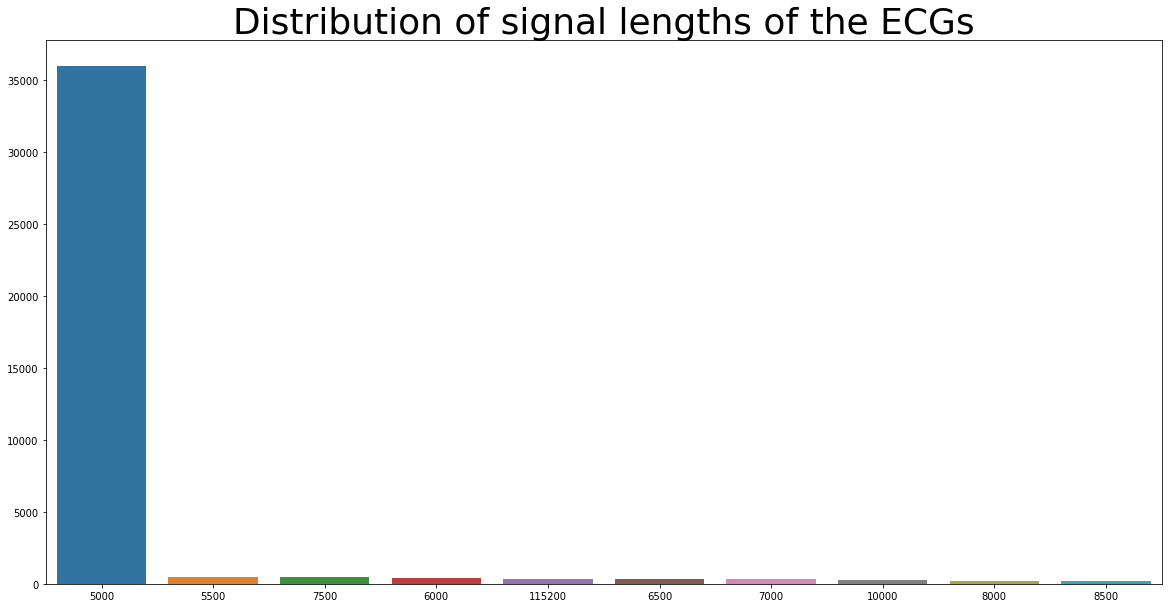

In [ ]:
get_signal_lengths("./WFDB/", "Distribution of signal lengths of the ECGs")

In [ ]:
def clean_up_gender_data(gender):
  gender = np.asarray(gender)
  gender[np.where(gender == "Male")] = 0
  gender[np.where(gender == "male")] = 0
  gender[np.where(gender == "M")] = 0
  gender[np.where(gender == "Female")] = 1
  gender[np.where(gender == "female")] = 1
  gender[np.where(gender == "F")] = 1
  gender[np.where(gender == "NaN")] = 2
  np.unique(gender)
  gender = gender.astype(np.int)
  return gender

def clean_up_age_data(age):
    age = np.asarray(age)
    age[np.where(age == "NaN")] = -1
    np.unique(age)
    age = age.astype(np.int)
    return age

def import_gender_and_age(age, gender):
    gender_binary = clean_up_gender_data(gender)
    age_clean = clean_up_age_data(age)
    print("gender data shape: {}".format(gender_binary.shape[0]))
    print("age data shape: {}".format(age_clean.shape[0]))
    return age_clean, gender_binary

In [ ]:
age, gender = import_gender_and_age(age, gender)

gender data shape: 43101
age data shape: 43101


In [ ]:
def make_undefined_class(labels, df_unscored):
    df_labels = pd.DataFrame(labels)
    for i in range(len(df_unscored.iloc[0:,1])):
        df_labels.replace(to_replace=str(df_unscored.iloc[i,1]), inplace=True ,value="undefined class", regex=True)

    return df_labels

In [ ]:
SNOMED_scored=pd.read_csv("SNOMED_mappings_scored.csv", sep=";")
SNOMED_unscored=pd.read_csv("SNOMED_mappings_unscored.csv", sep=";")
df_labels = make_undefined_class(labels,SNOMED_unscored)

In [ ]:
def onehot_encode(df_labels):
    one_hot = MultiLabelBinarizer()
    y=one_hot.fit_transform(df_labels[0].str.split(pat=','))
    print("The classes we will look at are encoded as SNOMED CT codes:")
    print(one_hot.classes_)
    y = np.delete(y, -1, axis=1)
    print("classes: {}".format(y.shape[1]))
    return y, one_hot.classes_[0:-1]

In [ ]:
y , snomed_classes = onehot_encode(df_labels)

The classes we will look at are encoded as SNOMED CT codes:
['10370003' '111975006' '164889003' '164890007' '164909002' '164917005'
 '164934002' '164947007' '17338001' '251146004' '270492004' '284470004'
 '39732003' '426177001' '426627000' '426783006' '427084000' '427172004'
 '427393009' '445118002' '47665007' '59118001' '59931005' '63593006'
 '698252002' '713426002' '713427006' 'undefined class']
classes: 27


In [ ]:
def plot_classes(classes, scored_classes,y):
    for j in range(len(classes)):
        for i in range(len(scored_classes.iloc[:,1])):
            if (str(scored_classes.iloc[:,1][i]) == classes[j]):
                classes[j] = scored_classes.iloc[:,0][i]
    plt.figure(figsize=(30,20))
    plt.bar(x=classes,height=y.sum(axis=0))
    plt.title("Distribution of Diagnosis", color = "black", fontsize = 30)
    plt.tick_params(axis="both", colors = "black")
    plt.xlabel("Diagnosis", color = "black")
    plt.ylabel("Count", color = "black")
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize = 20)
    plt.savefig("fordeling.png")
    plt.show()

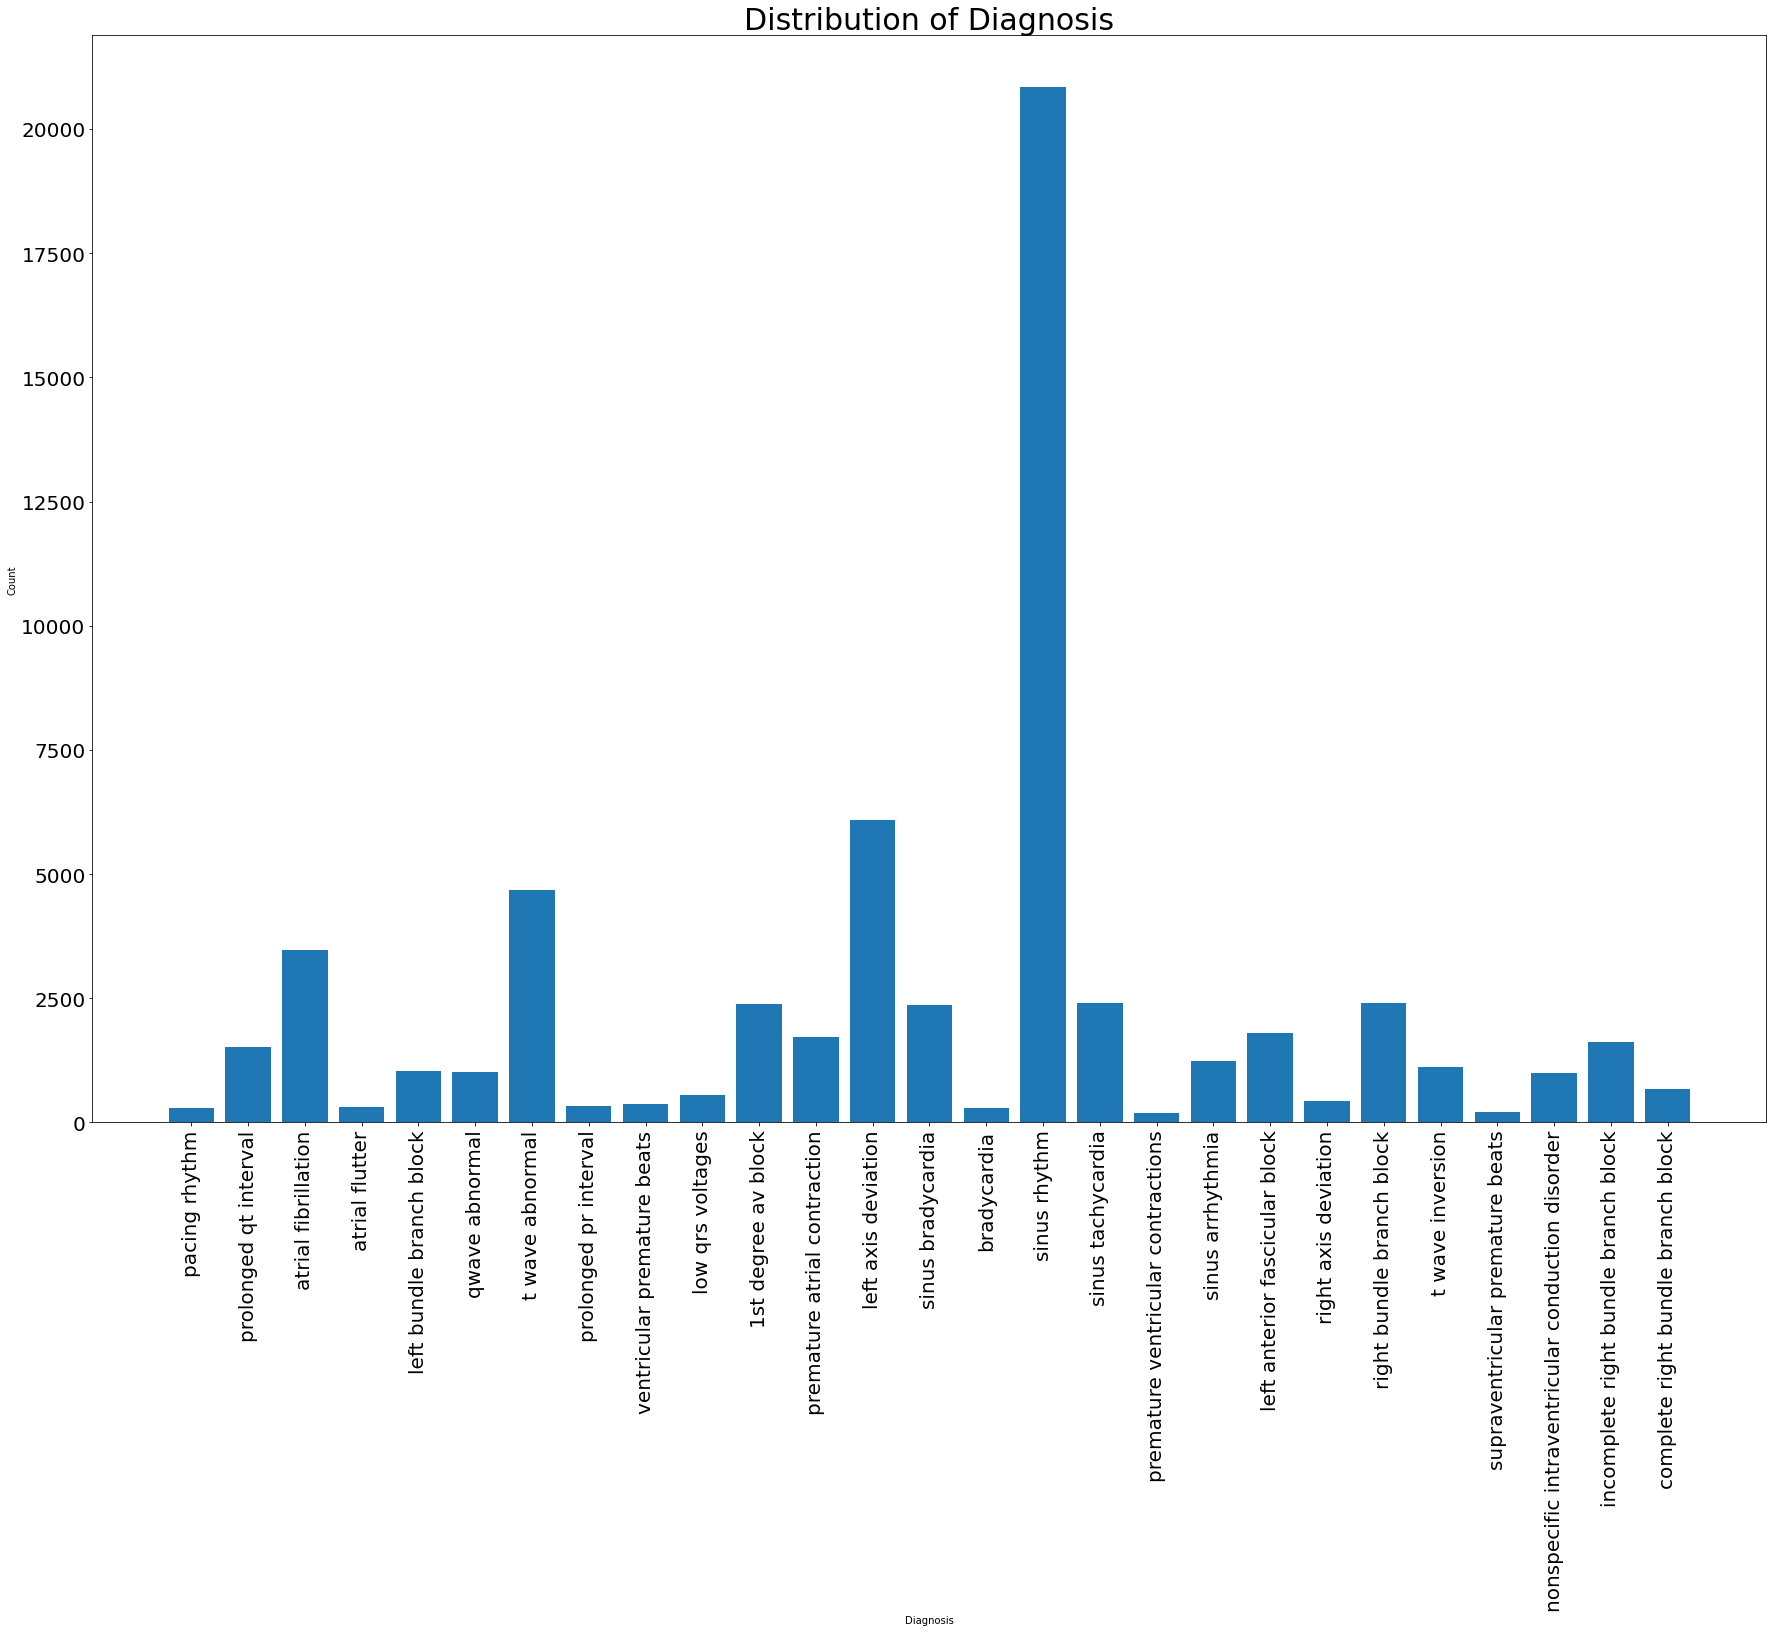

In [ ]:
plot_classes(snomed_classes, SNOMED_scored,y)

In [ ]:
def get_labels_for_all_combinations(y):
    y_all_combinations = LabelEncoder().fit_transform([''.join(str(l)) for l in y])
    return y_all_combinations

In [ ]:
y_all_comb = get_labels_for_all_combinations(y)
print("Total number of unique combinations of diagnosis: {}".format(len(np.unique(y_all_comb))))

Total number of unique combinations of diagnosis: 1414


In [ ]:
def split_data(labels, y_all_combo):
    folds = list(StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(labels,y_all_combo))
    print("Training split: {}".format(len(folds[0][0])))
    print("Validation split: {}".format(len(folds[0][1])))
    return folds

In [ ]:
def split_data_opt(labels, y_all_combo):
    folds = list(StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(labels,y_all_combo))
    print("Training split: {}".format(len(folds[0][0])))
    print("Validation split: {}".format(len(folds[0][1])))
    return folds

In [ ]:
folds = split_data(labels, y_all_comb)

Training split: 38790
Validation split: 4311


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
def plot_all_folds(folds,y,onehot_enc):
    X_axis_labels=onehot_enc
    plt.figure(figsize=(20,100))
    h=1
    for i in range(len(folds)):
        plt.subplot(10,2,h)
        plt.subplots_adjust(hspace=1.0)
        plt.bar(x= X_axis_labels, height=y[folds[i][0]].sum(axis=0))
        plt.title("Distribution of Diagnosis - Training set - Fold {}".format(i+1) ,fontsize="20", color = "black")
        plt.tick_params(axis="both", colors = "black")
        plt.xticks(rotation=90, fontsize=10)
        plt.yticks(fontsize = 10)
        #plt.xlabel("Diagnosis", color = "white")
        plt.ylabel("Count", color = "black")
        h=h+1
        plt.subplot(10,2,h)
        plt.subplots_adjust(hspace=1.0)
        plt.bar(x= X_axis_labels, height=y[folds[i][1]].sum(axis=0))
        plt.title("Distribution of Diagnosis - Validation set - Fold {}".format(i+1) ,fontsize="20", color = "black")
        plt.tick_params(axis="both", colors = "black")
        #plt.xlabel("Diagnosis", color = "white")
        plt.ylabel("Count", color = "black")
        plt.xticks(rotation=90, fontsize=10)
        plt.yticks(fontsize = 10)
        h=h+1

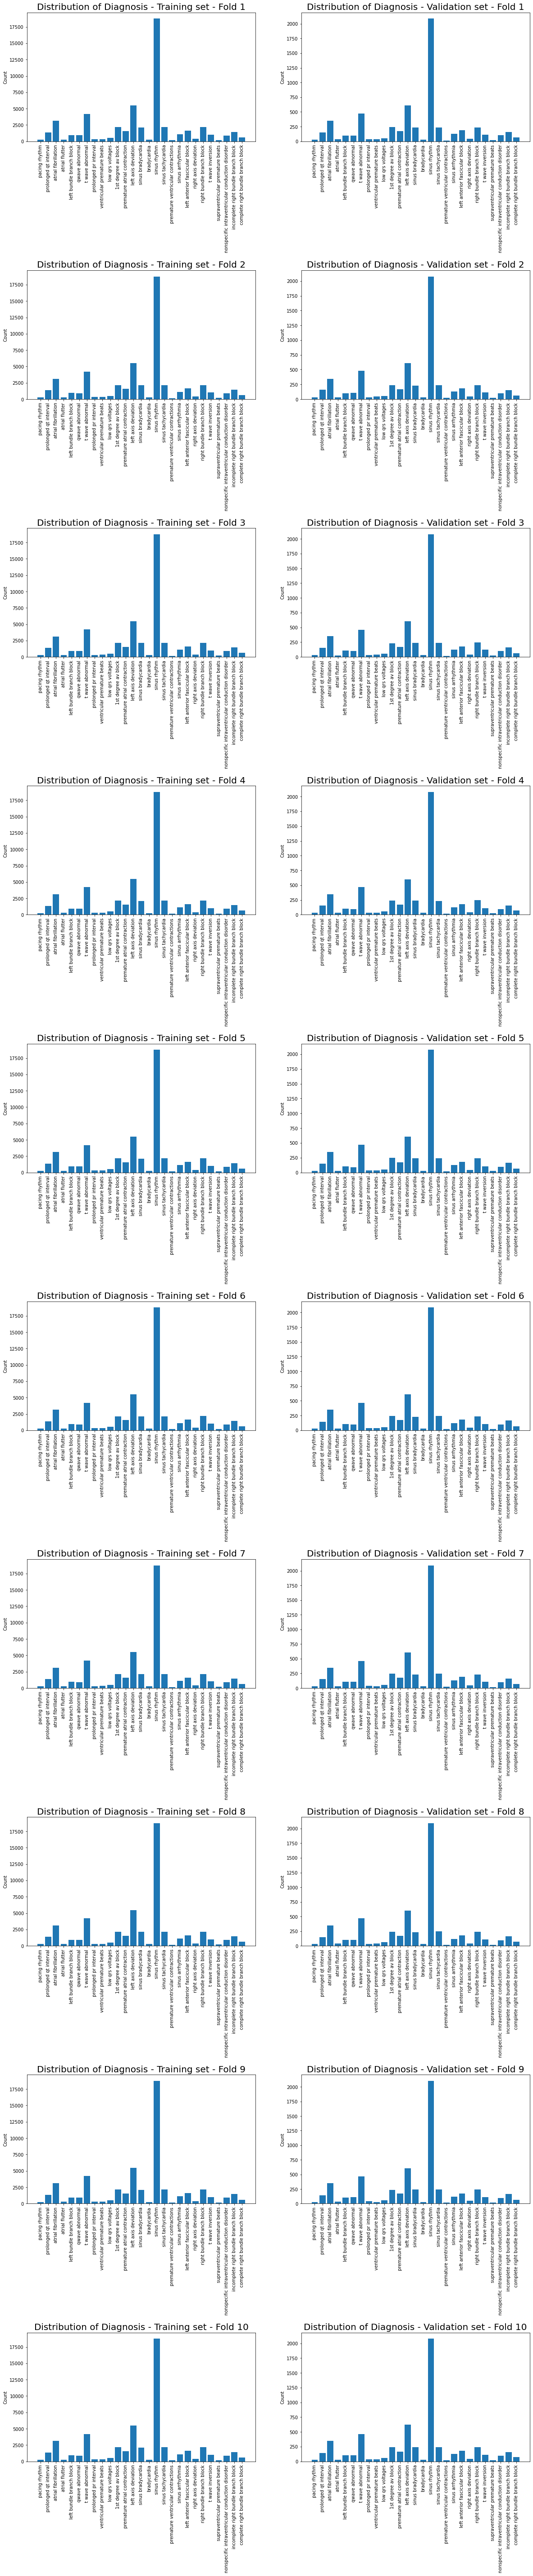

In [ ]:
plot_all_folds(folds,y,snomed_classes)

In [ ]:
def shuffle_batch_generator_demo(batch_size, gen_x,gen_y, gen_z): 
    np.random.shuffle(order_array)
    batch_features = np.zeros((batch_size,5000, 12))
    batch_labels = np.zeros((batch_size,snomed_classes.shape[0])) #drop undef class
    batch_demo_data = np.zeros((batch_size,2))
    while True:
        for i in range(batch_size):

            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
            batch_demo_data[i] = next(gen_z)

        X_combined = [batch_features, batch_demo_data]
        yield X_combined, batch_labels
        
def shuffle_batch_generator(batch_size, gen_x,gen_y): 
    np.random.shuffle(order_array)
    batch_features = np.zeros((batch_size,5000, 12))
    batch_labels = np.zeros((batch_size,snomed_classes.shape[0])) #drop undef class
    while True:
        for i in range(batch_size):

            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
            
        yield batch_features, batch_labels

def generate_y_shuffle(y_train):
    while True:
        for i in order_array:
            y_shuffled = y_train[i]
            yield y_shuffled


def generate_X_shuffle(X_train):
    while True:
        for i in order_array:
                #if filepath.endswith(".mat"):
                    data, header_data = load_challenge_data(X_train[i])
                    X_train_new = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
                    X_train_new = X_train_new.reshape(5000,12)
                    yield X_train_new

def generate_z_shuffle(age_train, gender_train):
    while True:
        for i in order_array:
            gen_age = age_train[i]
            gen_gender = gender_train[i]
            z_train = [gen_age , gen_gender]
            yield z_train

In [ ]:
def calculating_class_weights(y_true):
    number_dim = np.shape(y_true)[1]
    weights = np.empty([number_dim, 2])
    for i in range(number_dim):
        weights[i] = compute_class_weight('balanced', [0.,1.], y_true[:, i])
    return weights

In [ ]:
new_weights=calculating_class_weights(y)

In [ ]:
keys = np.arange(0,27,1)
weight_dictionary = dict(zip(keys, new_weights.T[1]))
weight_dictionary

{0: 72.0752508361204,
 1: 14.243555849306015,
 2: 6.201582733812949,
 3: 68.63216560509554,
 4: 20.701729106628243,
 5: 21.273938795656466,
 6: 4.611705542478066,
 7: 63.383823529411764,
 8: 59.04246575342466,
 9: 38.759892086330936,
 10: 9.00187969924812,
 11: 12.464141122035858,
 12: 3.5409957279000985,
 13: 9.13543874523103,
 14: 74.828125,
 15: 1.0337954523649622,
 16: 8.971898417985013,
 17: 114.63031914893617,
 18: 17.379435483870967,
 19: 11.932724252491694,
 20: 50.469555035128806,
 21: 8.971898417985013,
 22: 19.379946043165468,
 23: 100.23488372093023,
 24: 21.615346038114343,
 25: 13.37709497206704,
 26: 31.552708638360176}

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_AUC', factor=0.1, patience=1, verbose=1, mode='max',
    min_delta=0.0001, cooldown=0, min_lr=0
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_AUC', mode='max', verbose=4, patience=3)

In [ ]:
from scipy import optimize
def thr_chall_metrics(thr, label, output_prob):
    return -compute_challenge_metric_for_opt(label, np.array(output_prob>thr))

In [ ]:
def iterate_threshold(y_pred, ecg_filenames, y ,val_fold ):
    init_thresholds = np.arange(0,1,0.05)
    
    all_scores = []
    for i in init_thresholds:
        pred_output = y_pred > i
        pred_output = pred_output * 1
        score = compute_challenge_metric_for_opt(generate_validation_data(ecg_filenames,y,val_fold)[1],pred_output)
        print(score)
        all_scores.append(score)
    all_scores = np.asarray(all_scores)
    
    return all_scores

In [ ]:
def iterate_threshold_new(y_true,y_pred):
    init_thresholds = np.arange(0,1,0.05)
    
    all_scores = []
    for i in init_thresholds:
        pred_output = y_pred > i
        pred_output = pred_output * 1
        score = compute_challenge_metric_for_opt(y_true,pred_output)
        print(score)
        all_scores.append(score)
    all_scores = np.asarray(all_scores)
    
    return all_scores

In [ ]:
ecg_val_files = ecg_filenames[folds[0][1]]

In [ ]:
X_val = []
for j in ecg_val_files:
  data, header_data = load_challenge_data(j)
  ecg = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
  #for i in range(12):
  #  ecg[i] = nk.ecg_clean(ecg[i], sampling_rate=int(header_data[0].split(' ')[2]))
  ecg_shaped = ecg.reshape(5000,12)
  X_val.append(ecg_shaped)
X_val = np.asarray(X_val)

In [ ]:
def res_block_1(X):
  X_shortcut = X
  X_shortcut = tf.keras.layers.Conv1D(filters=24, kernel_size=5, padding="same")(X_shortcut)
  X_shortcut = tf.keras.layers.BatchNormalization()(X_shortcut)

  X = tf.keras.layers.Conv1D(filters=24, kernel_size=5, padding="same")(X)
  X = tf.keras.layers.BatchNormalization()(X)
  X = tf.keras.layers.Activation(tf.keras.layers.PReLU())(X)
  X = tf.keras.layers.Conv1D(filters=24, kernel_size=15, padding="same")(X)
  X = tf.keras.layers.BatchNormalization()(X)
  X = tf.keras.layers.Activation(tf.keras.layers.PReLU())(X)
  X = tf.keras.layers.Conv1D(filters=24, kernel_size=25, padding="same")(X)
  X = tf.keras.layers.BatchNormalization()(X)
  
  X = tf.keras.layers.add([X,X_shortcut])
  X = tf.keras.layers.Activation(tf.keras.layers.PReLU())(X)
  return X

def res_block_2(X):
  X_shortcut = X

  X = tf.keras.layers.Conv1D(filters=24, kernel_size=25, padding="same")(X)
  X = tf.keras.layers.BatchNormalization()(X)
  X = tf.keras.layers.Activation(tf.keras.layers.PReLU())(X)
  X = tf.keras.layers.Conv1D(filters=24, kernel_size=15, padding="same")(X)
  X = tf.keras.layers.BatchNormalization()(X)
  X = tf.keras.layers.Activation(tf.keras.layers.PReLU())(X)
  X = tf.keras.layers.Conv1D(filters=24, kernel_size=5, padding="same")(X)
  X = tf.keras.layers.BatchNormalization()(X)
  
  X = tf.keras.layers.add([X,X_shortcut])
  X = tf.keras.layers.Activation(tf.keras.layers.PReLU())(X)
  return X


def ResNet_1d():

    # define two sets of inputs
    input_layer = tf.keras.layers.Input(shape=(5000,12)) 
    block1 = tf.keras.layers.ZeroPadding1D()(input_layer)
    block1 = tf.keras.layers.Conv1D(filters=24, kernel_size=5)(block1)
    block1 = tf.keras.layers.BatchNormalization()(block1)
    block1 = tf.keras.layers.Activation(tf.keras.layers.PReLU())(block1)
    block1 = tf.keras.layers.ZeroPadding1D()(block1)
    block1_out = tf.keras.layers.MaxPool1D(pool_size=2)(block1)

    block2 = res_block_1(block1_out)
    block3 = res_block_2(block2)
    block4 = res_block_2(block3)
    block5 = res_block_1(block4)
    block6 = res_block_2(block5)
    block7 = res_block_2(block6)
    block8 = res_block_2(block7)
    block9 = res_block_1(block8)

    block10 = res_block_2(block9)
    block11 = res_block_2(block10)
    block12 = res_block_2(block11)
    block13 = res_block_2(block12)
    block14 = res_block_2(block13)

    block15 = res_block_1(block14)

    block16 = res_block_2(block15)
    block17 = res_block_2(block16)

    #gap_layer = keras.layers.GlobalAveragePooling1D()(conv3)
    flatten_layer = tf.keras.layers.Flatten()(block17)
    output_layer = tf.keras.layers.Dense(units=27,activation='sigmoid')(flatten_layer)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)


    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy(
        name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
                        tf.keras.metrics.AUC(
            num_thresholds=200,
            curve="ROC",
            summation_method="interpolation",
            name="AUC",
            dtype=None,
            thresholds=None,
            multi_label=True,
            label_weights=None,
        )])

    #@title Plot model for better visualization
    #plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    return model


In [ ]:
def encoder_model():
    input_layer = tf.keras.layers.Input(shape=(5000, 12))


     # conv block -1
    conv1 = tf.keras.layers.Conv1D(filters=128,kernel_size=5,strides=1,padding='same')(input_layer)
    conv1 = tfa.layers.InstanceNormalization()(conv1)
    conv1 = tf.keras.layers.PReLU(shared_axes=[1])(conv1)
    conv1 = tf.keras.layers.Dropout(rate=0.2)(conv1)
    conv1 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv1)
    # conv block -2
    conv2 = tf.keras.layers.Conv1D(filters=256,kernel_size=11,strides=1,padding='same')(conv1)
    conv2 = tfa.layers.InstanceNormalization()(conv2)
    conv2 = tf.keras.layers.PReLU(shared_axes=[1])(conv2)
    conv2 = tf.keras.layers.Dropout(rate=0.2)(conv2)
    conv2 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv2)
    # conv block -3
    conv3 = tf.keras.layers.Conv1D(filters=512,kernel_size=21,strides=1,padding='same')(conv2)
    conv3 = tfa.layers.InstanceNormalization()(conv3)
    conv3 = tf.keras.layers.PReLU(shared_axes=[1])(conv3)
    conv3 = tf.keras.layers.Dropout(rate=0.2)(conv3)
    # split for attention
    attention_data = tf.keras.layers.Lambda(lambda x: x[:,:,:])(conv3)
    attention_softmax = tf.keras.layers.Lambda(lambda x: x[:,:,:])(conv3)
    # attention mechanism
    attention_softmax = tf.keras.layers.Softmax()(attention_softmax)
    multiply_layer = tf.keras.layers.Multiply()([attention_softmax,attention_data])
    # last layer
    dense_layer = tf.keras.layers.Dense(units=512,activation='sigmoid')(multiply_layer)
    dense_layer = tfa.layers.InstanceNormalization()(dense_layer)
    # output layer
    flatten_layer = tf.keras.layers.Flatten()(dense_layer)
    output_layer = tf.keras.layers.Dense(units=27,activation='sigmoid')(flatten_layer)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=[tf.keras.metrics.CategoricalAccuracy(
        name='accuracy'),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
                    tf.keras.metrics.AUC(
        num_thresholds=200,
        curve="ROC",
        summation_method="interpolation",
        name="AUC",
        dtype=None,
        thresholds=None,
        multi_label=True,
        label_weights=None,
    )])

    return model

In [ ]:
y_val = y[folds[0][1]]

In [ ]:
model = encoder_model() # velg modell

In [ ]:
y_train = y[folds[0][0]]
order_array = folds[0][0]

batchsize = 30
model.fit(x=shuffle_batch_generator(batch_size=batchsize, gen_x=generate_X_shuffle(ecg_filenames), gen_y=generate_y_shuffle(y)), epochs=15, steps_per_epoch=(len(order_array)/batchsize), validation_data=(X_val,y_val), validation_freq=1, verbose = 1, class_weight=weight_dictionary, callbacks=[reduce_lr,early_stop])

Epoch 1/15
1293/1293 [==============================] - 116s 84ms/step - loss: 3.8137 - accuracy: 0.2518 - Recall: 0.0474 - Precision: 0.0648 - AUC: 0.5659 - val_loss: 0.1696 - val_accuracy: 0.3473 - val_Recall: 0.0091 - val_Precision: 0.4400 - val_AUC: 0.7082
Epoch 2/15
1293/1293 [==============================] - 107s 83ms/step - loss: 1.8327 - accuracy: 0.3445 - Recall: 0.0225 - Precision: 0.5769 - AUC: 0.7484 - val_loss: 0.1530 - val_accuracy: 0.3614 - val_Recall: 0.0847 - val_Precision: 0.6514 - val_AUC: 0.7809
Epoch 3/15
1293/1293 [==============================] - 107s 83ms/step - loss: 1.4723 - accuracy: 0.3773 - Recall: 0.1064 - Precision: 0.7297 - AUC: 0.8329 - val_loss: 0.1436 - val_accuracy: 0.3769 - val_Recall: 0.1507 - val_Precision: 0.6738 - val_AUC: 0.8007
Epoch 4/15
1293/1293 [==============================] - 107s 83ms/step - loss: 1.1937 - accuracy: 0.4092 - Recall: 0.1953 - Precision: 0.7720 - AUC: 0.8758 - val_loss: 0.1372 - val_accuracy: 0.3911 - val_Recall: 0.197

In [ ]:
ecg_train_files = ecg_filenames[folds[0][0]]

In [ ]:
t_wave_inv_train_files = ecg_train_files[np.where(y_train[:,22] == 1)[0]]

In [ ]:
y_train_twave = y_train[np.where(y_train[:,22] == 1)[0]]

In [ ]:
y_train_twave.shape

(1013, 27)

In [ ]:
tacy_train_files = ecg_train_files[np.where(y_train[:,16] == 1)[0]]

In [ ]:
y_train_tacy = y_train[np.where(y_train[:,16] == 1)[0]]

In [ ]:
y_train_tacy.shape

(2161, 27)

In [ ]:
X_exp_train = []
for j in ecg_train_files[0:5000]:
  data = load_challenge_data(j)[0]
  ecg = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
  ecg = ecg.reshape(5000,12)
  X_exp_train.append(ecg)
X_exp_train = np.asarray(X_exp_train)

In [ ]:
'''
X_exp_train = []
for j in t_wave_inv_train_files:
  data = load_challenge_data(j)[0]
  ecg = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
  ecg = ecg.reshape(5000,12)
  X_exp_train.append(ecg)
X_exp_train = np.asarray(X_exp_train)
'''

'\nX_exp_train = []\nfor j in t_wave_inv_train_files:\n  data = load_challenge_data(j)[0]\n  ecg = pad_sequences(data, maxlen=5000, truncating=\'post\',padding="post")\n  ecg = ecg.reshape(5000,12)\n  X_exp_train.append(ecg)\nX_exp_train = np.asarray(X_exp_train)\n'

In [ ]:
'''
X_exp_train = []
for j in tacy_train_files:
  data = load_challenge_data(j)[0]
  ecg = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
  ecg = ecg.reshape(5000,12)
  X_exp_train.append(ecg)
X_exp_train = np.asarray(X_exp_train)
'''

In [ ]:
!pip install lime

In [ ]:
!pip install git+https://github.com/Bsingstad/ecg_plot.git

  Cloning https://github.com/Bsingstad/ecg_plot.git to /tmp/pip-req-build-lto1k9wr
  Running command git clone -q https://github.com/Bsingstad/ecg_plot.git /tmp/pip-req-build-lto1k9wr
  Created wheel for ecg-plot: filename=ecg_plot-0.2.8-cp36-none-any.whl size=5405 sha256=f427312d183de26c68a2385c8c5e5ecd9ba3ee65e0bf0612529f3d728d7df7d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-s0g9dvl7/wheels/ad/f9/7b/bc52a3436ae4a0c85b5bbd17cfa7e5e76d375764385ff88566
Successfully built ecg-plot


In [ ]:

import lime
from lime import lime_tabular
explainer = lime_tabular.RecurrentTabularExplainer(X_exp_train, training_labels=y_train[0:5000], feature_names=["Lead-I","Lead-II", "Lead-III","aVR","aVL","aVF","V1","V2","V3","V4","V5","V6"],
                                                    class_names=[snomed_classes[0],snomed_classes[1], snomed_classes[2],snomed_classes[3],snomed_classes[4],snomed_classes[5], snomed_classes[6],snomed_classes[7],
                                                                 snomed_classes[8],snomed_classes[9], snomed_classes[10],snomed_classes[11],snomed_classes[12],snomed_classes[13], snomed_classes[14],snomed_classes[15],
                                                                snomed_classes[16],snomed_classes[17], snomed_classes[18],snomed_classes[19],snomed_classes[20],snomed_classes[21], snomed_classes[22],snomed_classes[23],
                                                                 snomed_classes[24],snomed_classes[25], snomed_classes[26]], discretize_continuous=False, feature_selection='auto')


In [ ]:
'''
import lime
from lime import lime_tabular
explainer = lime_tabular.RecurrentTabularExplainer(X_exp_train, training_labels=y_train_tacy, feature_names=["Lead-I","Lead-II", "Lead-III","aVR","aVL","aVF","V1","V2","V3","V4","V5","V6"],
                                                    class_names=[snomed_classes[0],snomed_classes[1], snomed_classes[2],snomed_classes[3],snomed_classes[4],snomed_classes[5], snomed_classes[6],snomed_classes[7],
                                                                 snomed_classes[8],snomed_classes[9], snomed_classes[10],snomed_classes[11],snomed_classes[12],snomed_classes[13], snomed_classes[14],snomed_classes[15],
                                                                snomed_classes[16],snomed_classes[17], snomed_classes[18],snomed_classes[19],snomed_classes[20],snomed_classes[21], snomed_classes[22],snomed_classes[23],
                                                                 snomed_classes[24],snomed_classes[25], snomed_classes[26]], discretize_continuous=False, feature_selection='auto')
'''
                                                                

In [ ]:
snomed_classes

array(['pacing rhythm', 'prolonged qt interval', 'atrial fibrillation',
       'atrial flutter', 'left bundle branch block', 'qwave abnormal',
       't wave abnormal', 'prolonged pr interval',
       'ventricular premature beats', 'low qrs voltages',
       '1st degree av block', 'premature atrial contraction',
       'left axis deviation', 'sinus bradycardia', 'bradycardia',
       'sinus rhythm', 'sinus tachycardia',
       'premature ventricular contractions', 'sinus arrhythmia',
       'left anterior fascicular block', 'right axis deviation',
       'right bundle branch block', 't wave inversion',
       'supraventricular premature beats',
       'nonspecific intraventricular conduction disorder',
       'incomplete right bundle branch block',
       'complete right bundle branch block'], dtype=object)

In [ ]:
snomed_classes[22]

't wave inversion'

In [ ]:
exp_lab = 22

In [ ]:
np.where(y_val[:,exp_lab] == 1)[0][0]

28

In [ ]:
ecg_num = np.where(y_val[:,exp_lab] == 1)[0][2]

In [ ]:
snomed_classes[np.where(y_val[ecg_num])]

array(['1st degree av block', 't wave inversion'], dtype=object)

In [ ]:
y_val[ecg_num]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0])

In [ ]:
exp = explainer.explain_instance(X_val[ecg_num].reshape(1,5000,12), model.predict, num_features=500, labels=(exp_lab,), num_samples = 4000)
#exp.show_in_notebook()

/usr/local/lib/python3.6/dist-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


In [ ]:
exp.predict_proba[exp_lab]

0.0165481

In [ ]:
exp.score

0.28805850832540225

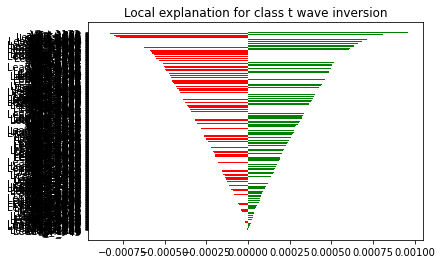

In [ ]:
exp.as_pyplot_figure(label=exp_lab)
plt.show()

In [ ]:
exp.show_in_notebook()

In [ ]:
exp.as_list(label=exp_lab)

[('V2_t-1173', 0.0009606570747650161),
 ('aVF_t-1831', 0.0008713005282859805),
 ('aVF_t-1073', -0.0008656943892782881),
 ('V3_t-1732', -0.000825643987322171),
 ('V3_t-613', 0.0008133468322398689),
 ('V2_t-3410', 0.0008097475253239176),
 ('V4_t-419', -0.0008064707928925924),
 ('Lead-II_t-976', -0.000803752420124253),
 ('aVR_t-547', -0.0008017170731795303),
 ('V2_t-1545', 0.0007949935263993717),
 ('Lead-I_t-273', -0.0007887268290065515),
 ('aVR_t-2005', -0.0007882291670863121),
 ('V6_t-678', -0.0007791054061978052),
 ('V3_t-4154', -0.0007686808312296424),
 ('V3_t-580', -0.000766519177365573),
 ('V4_t-4628', 0.0007637390871921507),
 ('V1_t-3892', -0.0007317078878469283),
 ('aVL_t-3606', -0.000729654697479391),
 ('Lead-III_t-4988', 0.0007166291990296716),
 ('V2_t-976', -0.0007095875855658166),
 ('V5_t-4856', 0.0007070701803321432),
 ('Lead-II_t-239', -0.0006900294853531502),
 ('V1_t-1940', -0.0006832921015948812),
 ('V6_t-1523', 0.0006823613783420062),
 ('V1_t-76', -0.0006749913370306969),

In [ ]:
explanations = exp.as_list(label=exp_lab)

In [ ]:
import ecg_plot

In [ ]:
weigth = []
for i in explanations:
  weigth.append(i[1])
weigth = np.asarray(weigth)

norm_weight = (abs(weigth) - abs(weigth).min())/(abs(weigth).max())-(abs(weigth).min())

In [ ]:
lead_I_exp_pos = []
lead_I_exp_neg = []
lead_I_pos_wei = []
lead_I_neg_wei = []
for h,i in enumerate(explanations):
  if i[0].split("_")[0] == "Lead-I":
    if i[1] > 0:
      lead_I_exp_pos.append(int(i[0].split("-")[-1]))
      lead_I_pos_wei.append(norm_weight[h])
    elif i[1] < 0:
      lead_I_exp_neg.append(int(i[0].split("-")[-1]))
      lead_I_neg_wei.append(norm_weight[h])

lead_I_exp_pos = np.asarray(lead_I_exp_pos)
lead_I_exp_neg = np.asarray(lead_I_exp_neg)
lead_I_pos_wei = np.asarray(lead_I_pos_wei)
lead_I_neg_wei = np.asarray(lead_I_neg_wei)

lead_II_exp_pos = []
lead_II_exp_neg = []
lead_II_pos_wei = []
lead_II_neg_wei = []
for h,i in enumerate(explanations):
  if i[0].split("_")[0] == "Lead-II":
    if i[1] > 0:
      lead_II_exp_pos.append(int(i[0].split("-")[-1]))
      lead_II_pos_wei.append(norm_weight[h])
    elif i[1] < 0:
      lead_II_exp_neg.append(int(i[0].split("-")[-1]))
      lead_II_neg_wei.append(norm_weight[h])

lead_II_exp_pos = np.asarray(lead_II_exp_pos)
lead_II_exp_neg = np.asarray(lead_II_exp_neg)
lead_II_pos_wei = np.asarray(lead_II_pos_wei)
lead_II_neg_wei = np.asarray(lead_II_neg_wei)

lead_III_exp_pos = []
lead_III_exp_neg = []
lead_III_pos_wei = []
lead_III_neg_wei = []
for h,i in enumerate(explanations):
  if i[0].split("_")[0] == "Lead-III":
    if i[1] > 0:
      lead_III_exp_pos.append(int(i[0].split("-")[-1]))
      lead_III_pos_wei.append(norm_weight[h])
    elif i[1] < 0:
      lead_III_exp_neg.append(int(i[0].split("-")[-1]))
      lead_III_neg_wei.append(norm_weight[h])

lead_III_exp_pos = np.asarray(lead_III_exp_pos)
lead_III_exp_neg = np.asarray(lead_III_exp_neg)
lead_III_pos_wei = np.asarray(lead_III_pos_wei)
lead_III_neg_wei = np.asarray(lead_III_neg_wei)

lead_aVR_exp_pos = []
lead_aVR_exp_neg = []
lead_aVR_pos_wei = []
lead_aVR_neg_wei = []
for h,i in enumerate(explanations):
  if i[0].split("_")[0] == "aVR":
    if i[1] > 0:
      lead_aVR_exp_pos.append(int(i[0].split("-")[-1]))
      lead_aVR_pos_wei.append(norm_weight[h])
    elif i[1] < 0:
      lead_aVR_exp_neg.append(int(i[0].split("-")[-1]))
      lead_aVR_neg_wei.append(norm_weight[h])

lead_aVR_exp_pos = np.asarray(lead_aVR_exp_pos)
lead_aVR_exp_neg = np.asarray(lead_aVR_exp_neg)
lead_aVR_pos_wei = np.asarray(lead_aVR_pos_wei)
lead_aVR_neg_wei = np.asarray(lead_aVR_neg_wei)

lead_aVL_exp_pos = []
lead_aVL_exp_neg = []
lead_aVL_pos_wei = []
lead_aVL_neg_wei = []
for h,i in enumerate(explanations):
  if i[0].split("_")[0] == "aVL":
    if i[1] > 0:
      lead_aVL_exp_pos.append(int(i[0].split("-")[-1]))
      lead_aVL_pos_wei.append(norm_weight[h])
    elif i[1] < 0:
      lead_aVL_exp_neg.append(int(i[0].split("-")[-1]))
      lead_aVL_neg_wei.append(norm_weight[h])

lead_aVL_exp_pos = np.asarray(lead_aVL_exp_pos)
lead_aVL_exp_neg = np.asarray(lead_aVL_exp_neg)
lead_aVL_pos_wei = np.asarray(lead_aVL_pos_wei)
lead_aVL_neg_wei = np.asarray(lead_aVL_neg_wei)

lead_aVF_exp_pos = []
lead_aVF_exp_neg = []
lead_aVF_pos_wei = []
lead_aVF_neg_wei = []
for h,i in enumerate(explanations):
  if i[0].split("_")[0] == "aVF":
    if i[1] > 0:
      lead_aVF_exp_pos.append(int(i[0].split("-")[-1]))
      lead_aVF_pos_wei.append(norm_weight[h])
    elif i[1] < 0:
      lead_aVF_exp_neg.append(int(i[0].split("-")[-1]))
      lead_aVF_neg_wei.append(norm_weight[h])

lead_aVF_exp_pos = np.asarray(lead_aVF_exp_pos)
lead_aVF_exp_neg = np.asarray(lead_aVF_exp_neg)
lead_aVF_pos_wei = np.asarray(lead_aVF_pos_wei)
lead_aVF_neg_wei = np.asarray(lead_aVF_neg_wei)

lead_V1_exp_pos = []
lead_V1_exp_neg = []
lead_V1_pos_wei = []
lead_V1_neg_wei = []
for h,i in enumerate(explanations):
  if i[0].split("_")[0] == "V1":
    if i[1] > 0:
      lead_V1_exp_pos.append(int(i[0].split("-")[-1]))
      lead_V1_pos_wei.append(norm_weight[h])
    elif i[1] < 0:
      lead_V1_exp_neg.append(int(i[0].split("-")[-1]))
      lead_V1_neg_wei.append(norm_weight[h])

lead_V1_exp_pos = np.asarray(lead_V1_exp_pos)
lead_V1_exp_neg = np.asarray(lead_V1_exp_neg)
lead_V1_pos_wei = np.asarray(lead_V1_pos_wei)
lead_V1_neg_wei = np.asarray(lead_V1_neg_wei)

lead_V2_exp_pos = []
lead_V2_exp_neg = []
lead_V2_pos_wei = []
lead_V2_neg_wei = []
for h,i in enumerate(explanations):
  if i[0].split("_")[0] == "V2":
    if i[1] > 0:
      lead_V2_exp_pos.append(int(i[0].split("-")[-1]))
      lead_V2_pos_wei.append(norm_weight[h])
    elif i[1] < 0:
      lead_V2_exp_neg.append(int(i[0].split("-")[-1]))
      lead_V2_neg_wei.append(norm_weight[h])

lead_V2_exp_pos = np.asarray(lead_V2_exp_pos)
lead_V2_exp_neg = np.asarray(lead_V2_exp_neg)
lead_V2_pos_wei = np.asarray(lead_V2_pos_wei)
lead_V2_neg_wei = np.asarray(lead_V2_neg_wei)

lead_V3_exp_pos = []
lead_V3_exp_neg = []
lead_V3_pos_wei = []
lead_V3_neg_wei = []
for h,i in enumerate(explanations):
  if i[0].split("_")[0] == "V3":
    if i[1] > 0:
      lead_V3_exp_pos.append(int(i[0].split("-")[-1]))
      lead_V3_pos_wei.append(norm_weight[h])
    elif i[1] < 0:
      lead_V3_exp_neg.append(int(i[0].split("-")[-1]))
      lead_V3_neg_wei.append(norm_weight[h])

lead_V3_exp_pos = np.asarray(lead_V3_exp_pos)
lead_V3_exp_neg = np.asarray(lead_V3_exp_neg)
lead_V3_pos_wei = np.asarray(lead_V3_pos_wei)
lead_V3_neg_wei = np.asarray(lead_V3_neg_wei)

lead_V4_exp_pos = []
lead_V4_exp_neg = []
lead_V4_pos_wei = []
lead_V4_neg_wei = []
for h,i in enumerate(explanations):
  if i[0].split("_")[0] == "V4":
    if i[1] > 0:
      lead_V4_exp_pos.append(int(i[0].split("-")[-1]))
      lead_V4_pos_wei.append(norm_weight[h])
    elif i[1] < 0:
      lead_V4_exp_neg.append(int(i[0].split("-")[-1]))
      lead_V4_neg_wei.append(norm_weight[h])

lead_V4_exp_pos = np.asarray(lead_V4_exp_pos)
lead_V4_exp_neg = np.asarray(lead_V4_exp_neg)
lead_V4_pos_wei = np.asarray(lead_V4_pos_wei)
lead_V4_neg_wei = np.asarray(lead_V4_neg_wei)

lead_V5_exp_pos = []
lead_V5_exp_neg = []
lead_V5_pos_wei = []
lead_V5_neg_wei = []
for h,i in enumerate(explanations):
  if i[0].split("_")[0] == "V5":
    if i[1] > 0:
      lead_V5_exp_pos.append(int(i[0].split("-")[-1]))
      lead_V5_pos_wei.append(norm_weight[h])
    elif i[1] < 0:
      lead_V5_exp_neg.append(int(i[0].split("-")[-1]))
      lead_V5_neg_wei.append(norm_weight[h])

lead_V5_exp_pos = np.asarray(lead_V5_exp_pos)
lead_V5_exp_neg = np.asarray(lead_V5_exp_neg)
lead_V5_pos_wei = np.asarray(lead_V5_pos_wei)
lead_V5_neg_wei = np.asarray(lead_V5_neg_wei)

lead_V6_exp_pos = []
lead_V6_exp_neg = []
lead_V6_pos_wei = []
lead_V6_neg_wei = []
for h,i in enumerate(explanations):
  if i[0].split("_")[0] == "V6":
    if i[1] > 0:
      lead_V6_exp_pos.append(int(i[0].split("-")[-1]))
      lead_V6_pos_wei.append(norm_weight[h])
    elif i[1] < 0:
      lead_V6_exp_neg.append(int(i[0].split("-")[-1]))
      lead_V6_neg_wei.append(norm_weight[h])

lead_V6_exp_pos = np.asarray(lead_V6_exp_pos)
lead_V6_exp_neg = np.asarray(lead_V6_exp_neg)
lead_V6_pos_wei = np.asarray(lead_V6_pos_wei)
lead_V6_neg_wei = np.asarray(lead_V6_neg_wei)

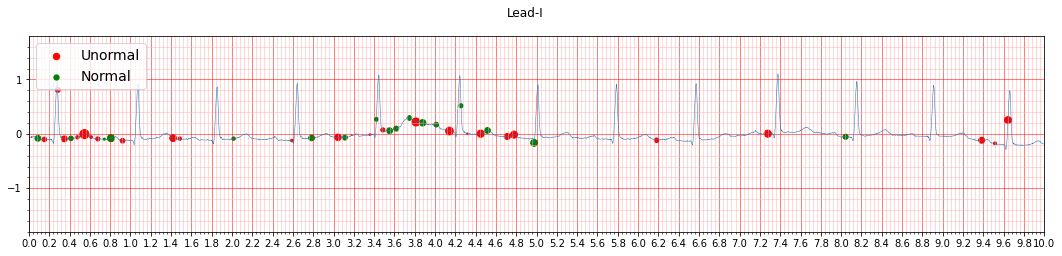

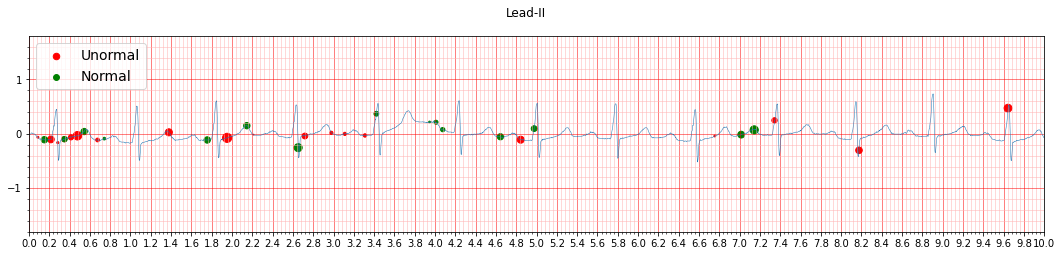

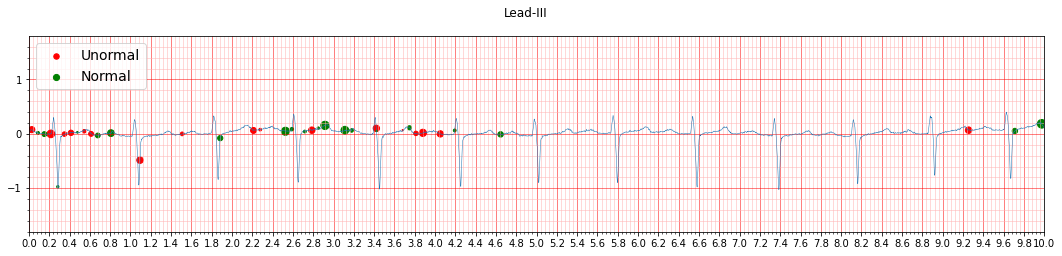

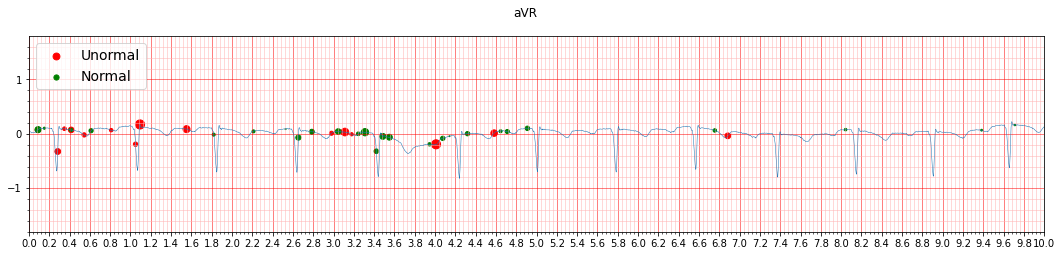

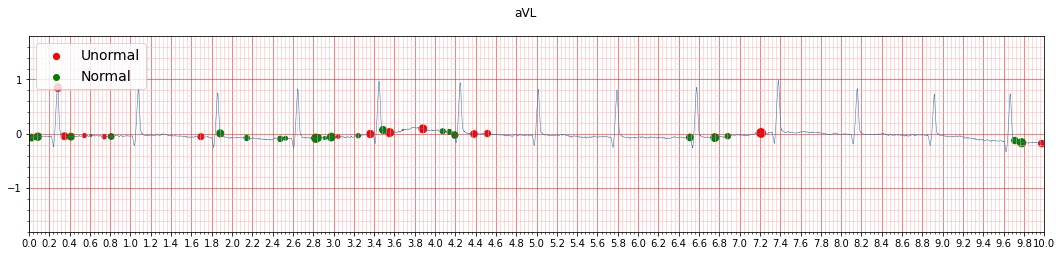

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


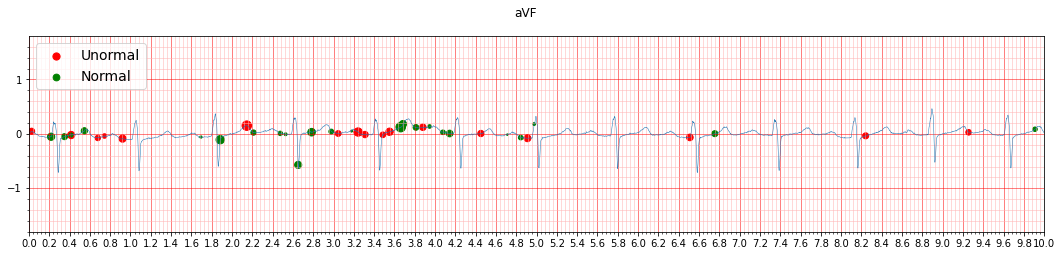

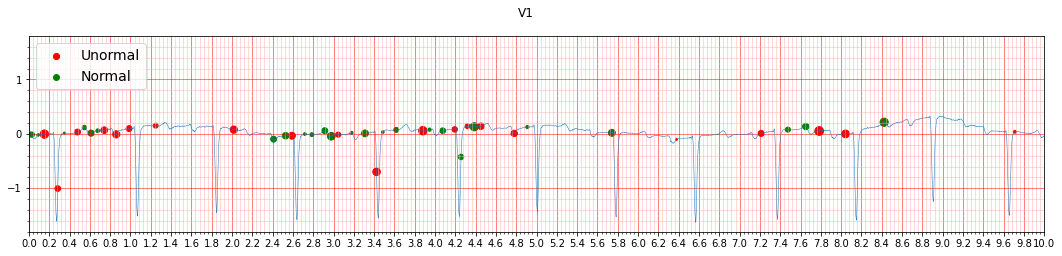

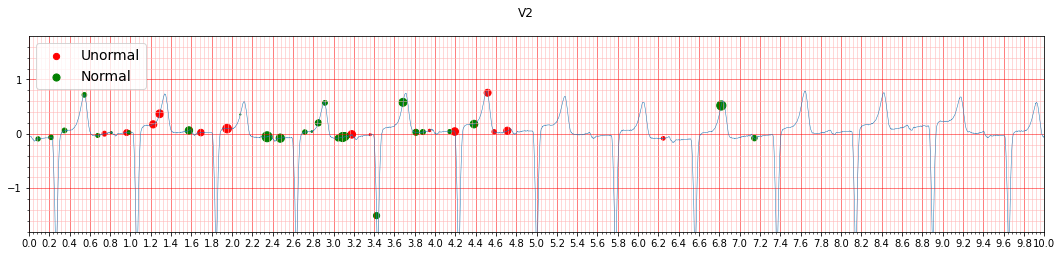

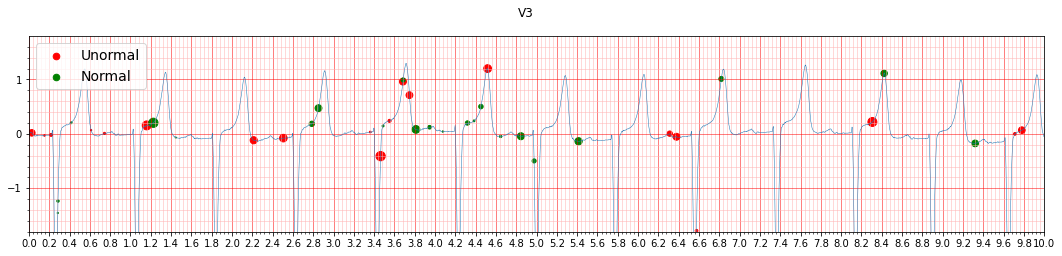

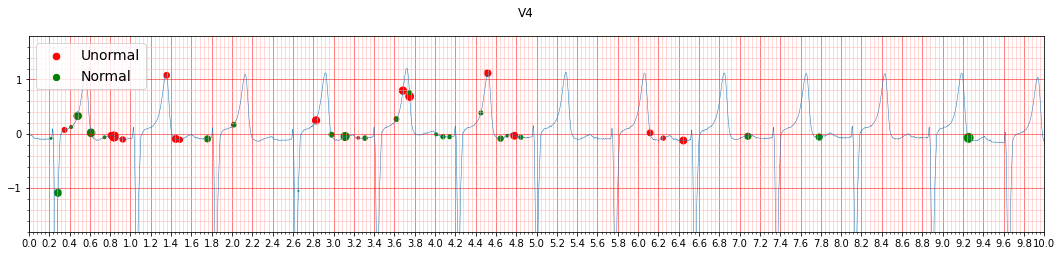

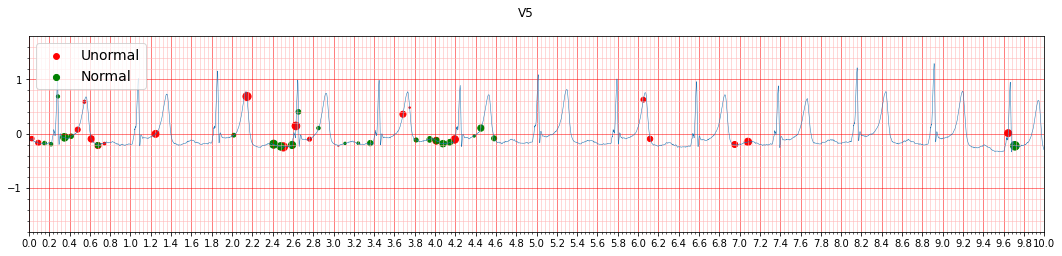

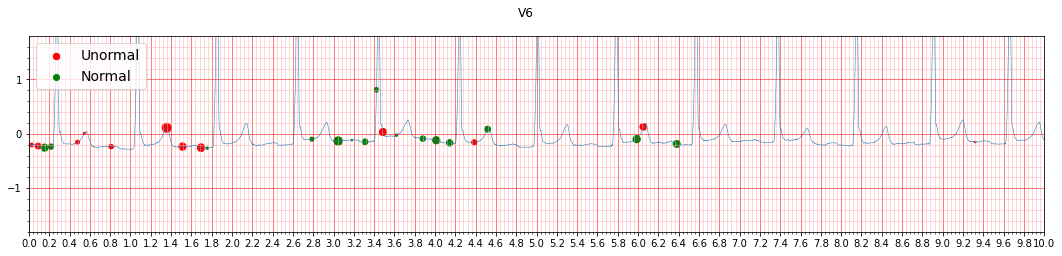

In [ ]:
ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[0] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title="Lead-I")
plt.scatter(lead_I_exp_neg/500,X_val[ecg_num].reshape(12,5000)[0][lead_I_exp_neg]/1000,color = "r", s = lead_I_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_I_exp_pos/500,X_val[ecg_num].reshape(12,5000)[0][lead_I_exp_pos]/1000,color = "g", s = lead_I_pos_wei* 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[1] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title="Lead-II")
plt.scatter(lead_II_exp_neg/500,X_val[ecg_num].reshape(12,5000)[1][lead_II_exp_neg]/1000,color = "r",  s = lead_II_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_II_exp_pos/500,X_val[ecg_num].reshape(12,5000)[1][lead_II_exp_pos]/1000,color = "g",  s = lead_II_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[2] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title="Lead-III")
plt.scatter(lead_III_exp_neg/500,X_val[ecg_num].reshape(12,5000)[2][lead_III_exp_neg]/1000,color = "r", s = lead_III_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_III_exp_pos/500,X_val[ecg_num].reshape(12,5000)[2][lead_III_exp_pos]/1000,color = "g", s = lead_III_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[3] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title="aVR")
plt.scatter(lead_aVR_exp_neg/500,X_val[ecg_num].reshape(12,5000)[3][lead_aVR_exp_neg]/1000,color = "r",  s = lead_aVR_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_aVR_exp_pos/500,X_val[ecg_num].reshape(12,5000)[3][lead_aVR_exp_pos]/1000,color = "g",  s = lead_aVR_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[4] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title="aVL")
plt.scatter(lead_aVL_exp_neg/500,X_val[ecg_num].reshape(12,5000)[4][lead_aVL_exp_neg]/1000,color = "r",  s = lead_aVL_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_aVL_exp_pos/500,X_val[ecg_num].reshape(12,5000)[4][lead_aVL_exp_pos]/1000,color = "g",  s = lead_aVL_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[5] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title="aVF")
plt.scatter(lead_aVF_exp_neg/500,X_val[ecg_num].reshape(12,5000)[5][lead_aVF_exp_neg]/1000,color = "r",  s = lead_aVF_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_aVF_exp_pos/500,X_val[ecg_num].reshape(12,5000)[5][lead_aVF_exp_pos]/1000,color = "g",  s = lead_aVF_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[6] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title="V1")
plt.scatter(lead_V1_exp_neg/500,X_val[ecg_num].reshape(12,5000)[6][lead_V1_exp_neg]/1000,color = "r",  s = lead_V1_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V1_exp_pos/500,X_val[ecg_num].reshape(12,5000)[6][lead_V1_exp_pos]/1000,color = "g",  s = lead_V1_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[7] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title="V2")
plt.scatter(lead_V2_exp_neg/500,X_val[ecg_num].reshape(12,5000)[7][lead_V2_exp_neg]/1000,color = "r",  s = lead_V2_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V2_exp_pos/500,X_val[ecg_num].reshape(12,5000)[7][lead_V2_exp_pos]/1000,color = "g",  s = lead_V2_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[8] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title="V3")
plt.scatter(lead_V3_exp_neg/500,X_val[ecg_num].reshape(12,5000)[8][lead_V3_exp_neg]/1000,color = "r",  s = lead_V3_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V3_exp_pos/500,X_val[ecg_num].reshape(12,5000)[8][lead_V3_exp_pos]/1000,color = "g",  s = lead_V3_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[9] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title="V4")
plt.scatter(lead_V4_exp_neg/500,X_val[ecg_num].reshape(12,5000)[9][lead_V4_exp_neg]/1000,color = "r",  s = lead_V4_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V4_exp_pos/500,X_val[ecg_num].reshape(12,5000)[9][lead_V4_exp_pos]/1000,color = "g",  s = lead_V4_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[10] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title="V5")
plt.scatter(lead_V5_exp_neg/500,X_val[ecg_num].reshape(12,5000)[10][lead_V5_exp_neg]/1000,color = "r",  s = lead_V5_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V5_exp_pos/500,X_val[ecg_num].reshape(12,5000)[10][lead_V5_exp_pos]/1000,color = "g",  s = lead_V5_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[11] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title="V6")
plt.scatter(lead_V6_exp_neg/500,X_val[ecg_num].reshape(12,5000)[11][lead_V6_exp_neg]/1000,color = "r",  s = lead_V6_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V6_exp_pos/500,X_val[ecg_num].reshape(12,5000)[11][lead_V6_exp_pos]/1000,color = "g",  s = lead_V6_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

In [ ]:
ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[0] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_I_exp_neg/500,X_val[ecg_num].reshape(12,5000)[0][lead_I_exp_neg]/1000,color = "r", s = lead_I_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_I_exp_pos/500,X_val[ecg_num].reshape(12,5000)[0][lead_I_exp_pos]/1000,color = "g", s = lead_I_pos_wei* 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("twave_abnormal_I", dpi=300)
ecg_plot.show()


ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[1] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_II_exp_neg/500,X_val[ecg_num].reshape(12,5000)[1][lead_II_exp_neg]/1000,color = "r",  s = lead_II_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_II_exp_pos/500,X_val[ecg_num].reshape(12,5000)[1][lead_II_exp_pos]/1000,color = "g",  s = lead_II_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("twave_abnormal_II", dpi=300)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[2] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_III_exp_neg/500,X_val[ecg_num].reshape(12,5000)[2][lead_III_exp_neg]/1000,color = "r", s = lead_III_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_III_exp_pos/500,X_val[ecg_num].reshape(12,5000)[2][lead_III_exp_pos]/1000,color = "g", s = lead_III_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("twave_abnormal_III", dpi=300)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[3] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_aVR_exp_neg/500,X_val[ecg_num].reshape(12,5000)[3][lead_aVR_exp_neg]/1000,color = "r",  s = lead_aVR_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_aVR_exp_pos/500,X_val[ecg_num].reshape(12,5000)[3][lead_aVR_exp_pos]/1000,color = "g",  s = lead_aVR_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("twave_abnormal_aVR", dpi=300)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[4] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_aVL_exp_neg/500,X_val[ecg_num].reshape(12,5000)[4][lead_aVL_exp_neg]/1000,color = "r",  s = lead_aVL_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_aVL_exp_pos/500,X_val[ecg_num].reshape(12,5000)[4][lead_aVL_exp_pos]/1000,color = "g",  s = lead_aVL_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("twave_abnormal_aVL", dpi=300)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[5] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_aVF_exp_neg/500,X_val[ecg_num].reshape(12,5000)[5][lead_aVF_exp_neg]/1000,color = "r",  s = lead_aVF_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_aVF_exp_pos/500,X_val[ecg_num].reshape(12,5000)[5][lead_aVF_exp_pos]/1000,color = "g",  s = lead_aVF_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("twave_abnormal_aVF", dpi=300)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[6] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_V1_exp_neg/500,X_val[ecg_num].reshape(12,5000)[6][lead_V1_exp_neg]/1000,color = "r",  s = lead_V1_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V1_exp_pos/500,X_val[ecg_num].reshape(12,5000)[6][lead_V1_exp_pos]/1000,color = "g",  s = lead_V1_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("twave_abnormal_V1", dpi=300)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[7] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_V2_exp_neg/500,X_val[ecg_num].reshape(12,5000)[7][lead_V2_exp_neg]/1000,color = "r",  s = lead_V2_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V2_exp_pos/500,X_val[ecg_num].reshape(12,5000)[7][lead_V2_exp_pos]/1000,color = "g",  s = lead_V2_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("twave_abnormal_V2", dpi=300)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[8] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_V3_exp_neg/500,X_val[ecg_num].reshape(12,5000)[8][lead_V3_exp_neg]/1000,color = "r",  s = lead_V3_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V3_exp_pos/500,X_val[ecg_num].reshape(12,5000)[8][lead_V3_exp_pos]/1000,color = "g",  s = lead_V3_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("twave_abnormal_V3", dpi=300)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[9] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_V4_exp_neg/500,X_val[ecg_num].reshape(12,5000)[9][lead_V4_exp_neg]/1000,color = "r",  s = lead_V4_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V4_exp_pos/500,X_val[ecg_num].reshape(12,5000)[9][lead_V4_exp_pos]/1000,color = "g",  s = lead_V4_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("twave_abnormal_V4", dpi=300)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[10] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_V5_exp_neg/500,X_val[ecg_num].reshape(12,5000)[10][lead_V5_exp_neg]/1000,color = "r",  s = lead_V5_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V5_exp_pos/500,X_val[ecg_num].reshape(12,5000)[10][lead_V5_exp_pos]/1000,color = "g",  s = lead_V5_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("twave_abnormal_V5", dpi=300)
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[11] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_V6_exp_neg/500,X_val[ecg_num].reshape(12,5000)[11][lead_V6_exp_neg]/1000,color = "r",  s = lead_V6_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V6_exp_pos/500,X_val[ecg_num].reshape(12,5000)[11][lead_V6_exp_pos]/1000,color = "g",  s = lead_V6_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("twave_abnormal_V6", dpi=300)
ecg_plot.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [ ]:
ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[0] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_I_exp_neg/500,X_val[ecg_num].reshape(12,5000)[0][lead_I_exp_neg]/1000,color = "r", s = lead_I_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_I_exp_pos/500,X_val[ecg_num].reshape(12,5000)[0][lead_I_exp_pos]/1000,color = "g", s = lead_I_pos_wei* 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("tacy_I")
ecg_plot.show()


ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[1] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_II_exp_neg/500,X_val[ecg_num].reshape(12,5000)[1][lead_II_exp_neg]/1000,color = "r",  s = lead_II_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_II_exp_pos/500,X_val[ecg_num].reshape(12,5000)[1][lead_II_exp_pos]/1000,color = "g",  s = lead_II_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("tacy_II")
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[2] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_III_exp_neg/500,X_val[ecg_num].reshape(12,5000)[2][lead_III_exp_neg]/1000,color = "r", s = lead_III_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_III_exp_pos/500,X_val[ecg_num].reshape(12,5000)[2][lead_III_exp_pos]/1000,color = "g", s = lead_III_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("tacy_III")
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[3] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_aVR_exp_neg/500,X_val[ecg_num].reshape(12,5000)[3][lead_aVR_exp_neg]/1000,color = "r",  s = lead_aVR_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_aVR_exp_pos/500,X_val[ecg_num].reshape(12,5000)[3][lead_aVR_exp_pos]/1000,color = "g",  s = lead_aVR_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("tacy_aVR")
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[4] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_aVL_exp_neg/500,X_val[ecg_num].reshape(12,5000)[4][lead_aVL_exp_neg]/1000,color = "r",  s = lead_aVL_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_aVL_exp_pos/500,X_val[ecg_num].reshape(12,5000)[4][lead_aVL_exp_pos]/1000,color = "g",  s = lead_aVL_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("tacy_aVL")
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[5] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_aVF_exp_neg/500,X_val[ecg_num].reshape(12,5000)[5][lead_aVF_exp_neg]/1000,color = "r",  s = lead_aVF_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_aVF_exp_pos/500,X_val[ecg_num].reshape(12,5000)[5][lead_aVF_exp_pos]/1000,color = "g",  s = lead_aVF_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("tacy_aVF")
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[6] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_V1_exp_neg/500,X_val[ecg_num].reshape(12,5000)[6][lead_V1_exp_neg]/1000,color = "r",  s = lead_V1_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V1_exp_pos/500,X_val[ecg_num].reshape(12,5000)[6][lead_V1_exp_pos]/1000,color = "g",  s = lead_V1_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("tacy_V1")
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[7] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_V2_exp_neg/500,X_val[ecg_num].reshape(12,5000)[7][lead_V2_exp_neg]/1000,color = "r",  s = lead_V2_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V2_exp_pos/500,X_val[ecg_num].reshape(12,5000)[7][lead_V2_exp_pos]/1000,color = "g",  s = lead_V2_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("tacy_V2")
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[8] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_V3_exp_neg/500,X_val[ecg_num].reshape(12,5000)[8][lead_V3_exp_neg]/1000,color = "r",  s = lead_V3_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V3_exp_pos/500,X_val[ecg_num].reshape(12,5000)[8][lead_V3_exp_pos]/1000,color = "g",  s = lead_V3_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("tacy_V3")
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[9] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_V4_exp_neg/500,X_val[ecg_num].reshape(12,5000)[9][lead_V4_exp_neg]/1000,color = "r",  s = lead_V4_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V4_exp_pos/500,X_val[ecg_num].reshape(12,5000)[9][lead_V4_exp_pos]/1000,color = "g",  s = lead_V4_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("tacy_V4")
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[10] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_V5_exp_neg/500,X_val[ecg_num].reshape(12,5000)[10][lead_V5_exp_neg]/1000,color = "r",  s = lead_V5_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V5_exp_pos/500,X_val[ecg_num].reshape(12,5000)[10][lead_V5_exp_pos]/1000,color = "g",  s = lead_V5_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("tacy_V5")
ecg_plot.show()

ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[11] *(1/1000), sample_rate=500, fig_width=15, fig_height=4,title=" ")
plt.scatter(lead_V6_exp_neg/500,X_val[ecg_num].reshape(12,5000)[11][lead_V6_exp_neg]/1000,color = "r",  s = lead_V6_neg_wei * 100, label ="Unormal" ) #label="Unormal"
plt.scatter(lead_V6_exp_pos/500,X_val[ecg_num].reshape(12,5000)[11][lead_V6_exp_pos]/1000,color = "g",  s = lead_V6_pos_wei * 100, label ="Normal") #label="po"
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("tacy_V6")
ecg_plot.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [ ]:
weigth.min()

-0.0018975887926131712

In [ ]:
weigth.max()

0.0020114966455986433

In [ ]:
from sklearn.preprocessing import normalize
normalize(weigth.reshape(1, -1))

In [ ]:
weigth

In [ ]:
lead_I_exp_pos = []
lead_I_exp_neg = []
for i in explanations:
  if i[0].split("_")[0] == "Lead-I":
    if i[1] > 0:
      lead_I_exp_pos.append(int(i[0].split("-")[-1]))
    elif i[1] < 0:
      lead_I_exp_neg.append(int(i[0].split("-")[-1]))

lead_I_exp_pos = np.asarray(lead_I_exp_pos)
lead_I_exp_neg = np.asarray(lead_I_exp_neg)

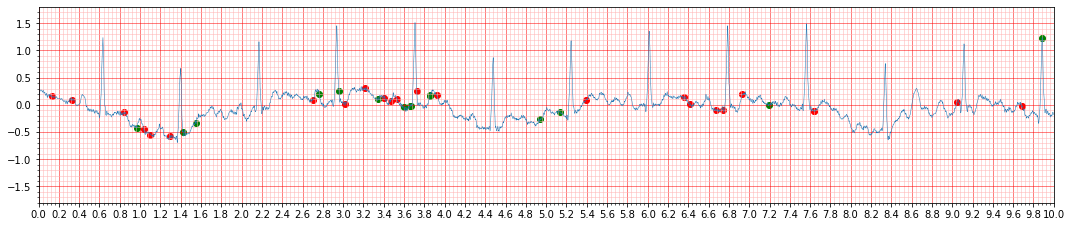

In [ ]:
ecg_plot.plot_1(X_val[ecg_num].reshape(12,5000)[0] *(2/1000), sample_rate=500, fig_width=15, fig_height=4,title="")
plt.scatter(lead_I_exp_neg/500,X_val[ecg_num].reshape(12,5000)[0][lead_I_exp_neg]/500,color = "r") #label="Unormal"
plt.scatter(lead_I_exp_pos/500,X_val[ecg_num].reshape(12,5000)[0][lead_I_exp_pos]/500,color = "g") #label="po"
#plt.legend(loc="upper left", fontsize=14)
ecg_plot.show()

In [ ]:
!pip install shap

     |████████████████████████████████| 327kB 9.2MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463907 sha256=98243b86139f440fb8ffbbfdc4e934e4c3adf1f4a52b55ca94a074d2aad37e82
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [ ]:
import shap


# print the JS visualization code to the notebook
shap.initjs()

# train a SVM classifier


# use Kernel SHAP to explain test set predictions


explainer = shap.KernelExplainer(model.predict, X_exp_train[0:100])



In [ ]:
explainer.expected_value[0]

0.00033325473528133414

In [ ]:
X_val[0].shape

(5000, 12)

In [ ]:
X_exp_train[0:100].shape

(100, 5000, 12)

In [ ]:
import shap

# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(model, X_exp_train[0:100])



AttributeError: ignored

In [ ]:
# explain the first 10 predictions
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(x_test[:10])

In [ ]:
model.layers[7]

In [ ]:
explainer = shap.GradientExplainer(
    (model.layers[1].input, model.layers[-1].output), X_exp_train[0:100]
)

In [ ]:
explainer.shap_values(X_val[:1])


TypeError: ignored

In [ ]:
X_val[:1].shape

(1, 5000, 12)